In [1]:
import os
import matplotlib.pyplot as plt
import model
import torch

from constants import model_params, base_data_path
from IPython.display import Image 
from matplotlib.pyplot import imshow
from utils import *


no display found. Using non-interactive Agg backend
No module named 'foundations'


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# see issue #152
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# Directory from which we read the data
mode = "unlabeled"  # real, fake, or unlabeled

# Convert files to flac
# convert_to_flac(os.path.join(data_dir,mode))
dirpath = '../datasets/train/audios'
filenames = os.listdir(dirpath)
# filenames = [f'{dirpath}/{filename}' for filename in filenames]
filenames = filenames[:2]
print(filenames)

['b60f26191faa3fe9.aac', '83b751e60542c388.aac']


In [3]:
print(dirpath)
# print(os.path.join(filenames[0], dirpath, mode))
processed_data = preprocess_from_filenames(
    filenames=filenames, dirpath=dirpath, mode='unlabeled',
    use_parallel=True
)

../datasets/train/audios


100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.72it/s]
/home/milselarch/projects/AISG/venv/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/milselarch/projects/AISG/venv/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [4]:
model_params

{'num_freq_bin': 240,
 'num_conv_blocks': 8,
 'num_conv_filters': 32,
 'spatial_dropout_fraction': 0.05,
 'num_dense_layers': 1,
 'num_dense_neurons': 50,
 'dense_dropout': 0,
 'learning_rate': 0.0001,
 'epochs': 1,
 'batch_size': 156,
 'residual_con': 2,
 'use_default': True,
 'model_save_dir': 'fitted_objects'}

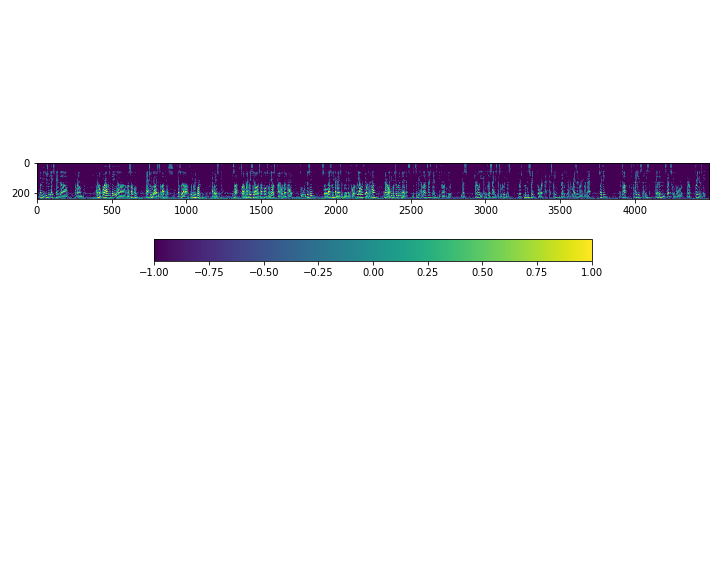

In [5]:
%matplotlib inline
image_path = 'visualize_inference_spectrogram.png'
plot_spectrogram(
    processed_data[0],
    path=image_path
)
pil_img = Image(filename=image_path)
display(pil_img)

In [6]:
print(model_params)
discriminator = model.Discriminator(
    num_freq_bin=model_params['num_freq_bin'],
    init_neurons=model_params['num_conv_filters'],
    num_conv_blocks=model_params['num_conv_blocks'],
    residual_con=model_params['residual_con'],
    num_dense_neurons=model_params['num_dense_neurons'],
    dense_dropout=model_params['dense_dropout'],
    num_dense_layers=model_params['num_dense_layers'],
)

{'num_freq_bin': 240, 'num_conv_blocks': 8, 'num_conv_filters': 32, 'spatial_dropout_fraction': 0.05, 'num_dense_layers': 1, 'num_dense_neurons': 50, 'dense_dropout': 0, 'learning_rate': 0.0001, 'epochs': 1, 'batch_size': 156, 'residual_con': 2, 'use_default': True, 'model_save_dir': 'fitted_objects'}
CONV LAYER 0 3
Sequential(
  (0): Conv1d(240, 32, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=32, out_features=32, bias=True)
  (2): LeakyReLU(negative_slope=0.3)
)
CONV LAYER 0 5
Sequential(
  (0): Conv1d(240, 32, kernel_size=(5,), stride=(1,), padding=(4,))
  (1): Linear(in_features=32, out_features=32, bias=True)
  (2): LeakyReLU(negative_slope=0.3)
)
CONV LAYER 0 7
Sequential(
  (0): Conv1d(240, 32, kernel_size=(7,), stride=(1,), padding=(6,))
  (1): Linear(in_features=32, out_features=32, bias=True)
  (2): LeakyReLU(negative_slope=0.3)
)
CONV LAYER 1 3
Sequential(
  (0): Conv1d(240, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (1): Linear(in_features=

In [31]:
print(processed_data[0].shape)
# print(processed_data[0])

input_batch = processed_data[0][:model_params['batch_size']]
pad_batch = get_zero_pad(input_batch)
keras_batch_x = pad_batch.reshape((1, -1, hparams.num_mels))
batch_x = torch.tensor(keras_batch_x).permute(0, 2, 1)

print(input_batch.shape)
print(pad_batch.shape)
print(batch_x.shape)
print(inputs.shape)
# print(inputs)

pred = discriminator.convnet_3_layers[0](inputs)

(4498, 240)
(156, 240)
(156, 240)
torch.Size([1, 240, 156])
torch.Size([1, 240, 156])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x158 and 32x32)

In [ ]:
37440/32/240/156


In [27]:
discriminator.convnet_3_layers[0](batch_x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x158 and 32x32)

In [ ]:
discriminator.convnet_3_layers[0]